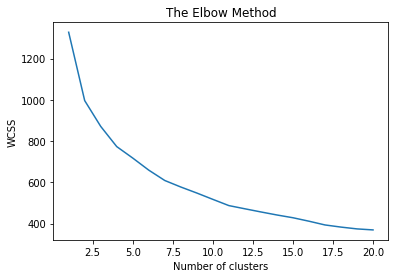

No handles with labels found to put in legend.


[3 1 4 3 3 1 3 3 3 3 0 1 3 1 0 1 1 1 4 0 3 0 3 3 2 3 3 3 3 1 0 4 0 3 3 0 0
 3 0 0 2 0 3 2 1 0 4 1 3 0 3 2 3 3 3 1 1 1 1 2 3 0 0 1 0 2 3 0 3 3 2 2 4 1
 1 0 0 3 0 0 3 4 2 1 2 3 0 2 1 1 1 0 0 4 0 2 3 3 0 2 0 3 3 3 3 1 3 0 0 0 0
 0 3 1 0 0 3 2 3 2 0 2 2 0 3 2 4 3 0 1 4 1 4 1 3 1 3 3 3 3 3 1 2 0 0 1 3 3
 0 0 3 1 1 0 2 3 0 2 0 0 2 0 3 1 2 3]


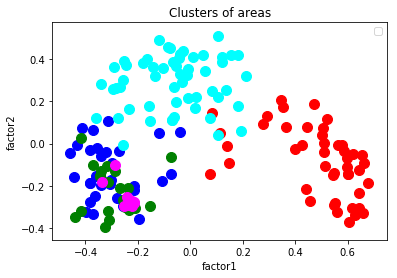

In [17]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('crime.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,12]].values


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 4)
y_kmeans = kmeans.fit_predict(X)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )


print(y_kmeans)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('factor1')
plt.ylabel('factor2')
plt.legend()

plt.show()


In [19]:
y_kmeans.reshape(1,166)

array([[3, 1, 4, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1, 1, 1, 4, 0, 3, 0,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 4, 0, 3, 3, 0, 0, 3, 0, 0, 2, 0, 3, 2,
        1, 0, 4, 1, 3, 0, 3, 2, 3, 3, 3, 1, 1, 1, 1, 2, 3, 0, 0, 1, 0, 2,
        3, 0, 3, 3, 2, 2, 4, 1, 1, 0, 0, 3, 0, 0, 3, 4, 2, 1, 2, 3, 0, 2,
        1, 1, 1, 0, 0, 4, 0, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 1, 3, 0, 0, 0,
        0, 0, 3, 1, 0, 0, 3, 2, 3, 2, 0, 2, 2, 0, 3, 2, 4, 3, 0, 1, 4, 1,
        4, 1, 3, 1, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 3, 3, 0, 0, 3, 1, 1, 0,
        2, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 3]], dtype=int32)